In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from dateutil.parser import parse
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Settings
Get the current bloomberg composition list.  
We still don't have a list of components for the time series SP500, so this needs to be improved.

In [ ]:
curr_tickers = ["A UN Equity","AAPL UW Equity","ABBV UN Equity","ABNB UW Equity","ABT UN Equity","ACGL UW Equity","ACN UN Equity","ADBE UW Equity","ADI UW Equity","ADM UN Equity","ADP UW Equity","ADSK UW Equity","AEE UN Equity","AEP UW Equity","AES UN Equity","AFL UN Equity","AIG UN Equity","AIZ UN Equity","AJG UN Equity","AKAM UW Equity","ALB UN Equity","ALGN UW Equity","ALL UN Equity","ALLE UN Equity","AMAT UW Equity","AMCR UN Equity","AMD UW Equity","AME UN Equity","AMGN UW Equity","AMP UN Equity","AMT UN Equity","AMZN UW Equity","ANET UN Equity","ANSS UW Equity","AON UN Equity","AOS UN Equity","APA UW Equity","APD UN Equity","APH UN Equity","APTV UN Equity","ARE UN Equity","ATO UN Equity","AVB UN Equity","AVGO UW Equity","AVY UN Equity","AWK UN Equity","AXON UW Equity","AXP UN Equity","AZO UN Equity","BA UN Equity","BAC UN Equity","BALL UN Equity","BAX UN Equity","BBWI UN Equity","BBY UN Equity","BDX UN Equity","BEN UN Equity","BF/B UN Equity","BG UN Equity","BIIB UW Equity","BK UN Equity","BKNG UW Equity","BKR UW Equity","BLDR UN Equity","BLK UN Equity","BMY UN Equity","BR UN Equity","BRK/B UN Equity","BRO UN Equity","BSX UN Equity","BWA UN Equity","BX UN Equity","BXP UN Equity","C UN Equity","CAG UN Equity","CAH UN Equity","CARR UN Equity","CAT UN Equity","CB UN Equity","CBOE UF Equity","CBRE UN Equity","CCI UN Equity","CCL UN Equity","CDNS UW Equity","CDW UW Equity","CE UN Equity","CEG UW Equity","CF UN Equity","CFG UN Equity","CHD UN Equity","CHRW UW Equity","CHTR UW Equity","CI UN Equity","CINF UW Equity","CL UN Equity","CLX UN Equity","CMCSA UW Equity","CME UW Equity","CMG UN Equity","CMI UN Equity","CMS UN Equity","CNC UN Equity","CNP UN Equity","COF UN Equity","COO UW Equity","COP UN Equity","COR UN Equity","COST UW Equity","CPAY UN Equity","CPB UW Equity","CPRT UW Equity","CPT UN Equity","CRL UN Equity","CRM UN Equity","CRWD UW Equity","CSCO UW Equity","CSGP UW Equity","CSX UW Equity","CTAS UW Equity","CTLT UN Equity","CTRA UN Equity","CTSH UW Equity","CTVA UN Equity","CVS UN Equity","CVX UN Equity","CZR UW Equity","D UN Equity","DAL UN Equity","DAY UN Equity","DD UN Equity","DE UN Equity","DECK UN Equity","DELL UN Equity","DFS UN Equity","DG UN Equity","DGX UN Equity","DHI UN Equity","DHR UN Equity","DIS UN Equity","DLR UN Equity","DLTR UW Equity","DOC UN Equity","DOV UN Equity","DOW UN Equity","DPZ UN Equity","DRI UN Equity","DTE UN Equity","DUK UN Equity","DVA UN Equity","DVN UN Equity","DXCM UW Equity","EA UW Equity","EBAY UW Equity","ECL UN Equity","ED UN Equity","EFX UN Equity","EG UN Equity","EIX UN Equity","EL UN Equity","ELV UN Equity","EMN UN Equity","EMR UN Equity","ENPH UQ Equity","EOG UN Equity","EPAM UN Equity","EQIX UW Equity","EQR UN Equity","EQT UN Equity","ERIE UW Equity","ES UN Equity","ESS UN Equity","ETN UN Equity","ETR UN Equity","EVRG UW Equity","EW UN Equity","EXC UW Equity","EXPD UN Equity","EXPE UW Equity","EXR UN Equity","F UN Equity","FANG UW Equity","FAST UW Equity","FCX UN Equity","FDS UN Equity","FDX UN Equity","FE UN Equity","FFIV UW Equity","FI UN Equity","FICO UN Equity","FIS UN Equity","FITB UW Equity","FMC UN Equity","FOX UW Equity","FOXA UW Equity","FRT UN Equity","FSLR UW Equity","FTNT UW Equity","FTV UN Equity","GD UN Equity","GDDY UN Equity","GE UN Equity","GEHC UW Equity","GEN UW Equity","GEV UN Equity","GILD UW Equity","GIS UN Equity","GL UN Equity","GLW UN Equity","GM UN Equity","GNRC UN Equity","GOOG UW Equity","GOOGL UW Equity","GPC UN Equity","GPN UN Equity","GRMN UN Equity","GS UN Equity","GWW UN Equity","HAL UN Equity","HAS UW Equity","HBAN UW Equity","HCA UN Equity","HD UN Equity","HES UN Equity","HIG UN Equity","HII UN Equity","HLT UN Equity","HOLX UW Equity","HON UW Equity","HPE UN Equity","HPQ UN Equity","HRL UN Equity","HSIC UW Equity","HST UW Equity","HSY UN Equity","HUBB UN Equity","HUM UN Equity","HWM UN Equity","IBM UN Equity","ICE UN Equity","IDXX UW Equity","IEX UN Equity","IFF UN Equity","INCY UW Equity","INTC UW Equity","INTU UW Equity","INVH UN Equity","IP UN Equity","IPG UN Equity","IQV UN Equity","IR UN Equity","IRM UN Equity","ISRG UW Equity","IT UN Equity","ITW UN Equity","IVZ UN Equity","J UN Equity","JBHT UW Equity","JBL UN Equity","JCI UN Equity","JKHY UW Equity","JNJ UN Equity","JNPR UN Equity","JPM UN Equity","K UN Equity","KDP UW Equity","KEY UN Equity","KEYS UN Equity","KHC UW Equity","KIM UN Equity","KKR UN Equity","KLAC UW Equity","KMB UN Equity","KMI UN Equity","KMX UN Equity","KO UN Equity","KR UN Equity","KVUE UN Equity","L UN Equity","LDOS UN Equity","LEN UN Equity","LH UN Equity","LHX UN Equity","LIN UW Equity","LKQ UW Equity","LLY UN Equity","LMT UN Equity","LNT UW Equity","LOW UN Equity","LRCX UW Equity","LULU UW Equity","LUV UN Equity","LVS UN Equity","LW UN Equity","LYB UN Equity","LYV UN Equity","MA UN Equity","MAA UN Equity","MAR UW Equity","MAS UN Equity","MCD UN Equity","MCHP UW Equity","MCK UN Equity","MCO UN Equity","MDLZ UW Equity","MDT UN Equity","MET UN Equity","META UW Equity","MGM UN Equity","MHK UN Equity","MKC UN Equity","MKTX UW Equity","MLM UN Equity","MMC UN Equity","MMM UN Equity","MNST UW Equity","MO UN Equity","MOH UN Equity","MOS UN Equity","MPC UN Equity","MPWR UW Equity","MRK UN Equity","MRNA UW Equity","MRO UN Equity","MS UN Equity","MSCI UN Equity","MSFT UW Equity","MSI UN Equity","MTB UN Equity","MTCH UW Equity","MTD UN Equity","MU UW Equity","NCLH UN Equity","NDAQ UW Equity","NDSN UW Equity","NEE UN Equity","NEM UN Equity","NFLX UW Equity","NI UN Equity","NKE UN Equity","NOC UN Equity","NOW UN Equity","NRG UN Equity","NSC UN Equity","NTAP UW Equity","NTRS UW Equity","NUE UN Equity","NVDA UW Equity","NVR UN Equity","NWS UW Equity","NWSA UW Equity","NXPI UW Equity","O UN Equity","ODFL UW Equity","OKE UN Equity","OMC UN Equity","ON UW Equity","ORCL UN Equity","ORLY UW Equity","OTIS UN Equity","OXY UN Equity","PANW UW Equity","PARA UW Equity","PAYC UN Equity","PAYX UW Equity","PCAR UW Equity","PCG UN Equity","PEG UN Equity","PEP UW Equity","PFE UN Equity","PFG UW Equity","PG UN Equity","PGR UN Equity","PH UN Equity","PHM UN Equity","PKG UN Equity","PLD UN Equity","PLTR UN Equity","PM UN Equity","PNC UN Equity","PNR UN Equity","PNW UN Equity","PODD UW Equity","POOL UW Equity","PPG UN Equity","PPL UN Equity","PRU UN Equity","PSA UN Equity","PSX UN Equity","PTC UW Equity","PWR UN Equity","PYPL UW Equity","QCOM UW Equity","QRVO UW Equity","RCL UN Equity","REG UW Equity","REGN UW Equity","RF UN Equity","RJF UN Equity","RL UN Equity","RMD UN Equity","ROK UN Equity","ROL UN Equity","ROP UW Equity","ROST UW Equity","RSG UN Equity","RTX UN Equity","RVTY UN Equity","SBAC UW Equity","SBUX UW Equity","SCHW UN Equity","SHW UN Equity","SJM UN Equity","SLB UN Equity","SMCI UW Equity","SNA UN Equity","SNPS UW Equity","SO UN Equity","SOLV UN Equity","SPG UN Equity","SPGI UN Equity","SRE UN Equity","STE UN Equity","STLD UW Equity","STT UN Equity","STX UW Equity","STZ UN Equity","SW UN Equity","SWK UN Equity","SWKS UW Equity","SYF UN Equity","SYK UN Equity","SYY UN Equity","T UN Equity","TAP UN Equity","TDG UN Equity","TDY UN Equity","TECH UW Equity","TEL UN Equity","TER UW Equity","TFC UN Equity","TFX UN Equity","TGT UN Equity","TJX UN Equity","TMO UN Equity","TMUS UW Equity","TPR UN Equity","TRGP UN Equity","TRMB UW Equity","TROW UW Equity","TRV UN Equity","TSCO UW Equity","TSLA UW Equity","TSN UN Equity","TT UN Equity","TTWO UW Equity","TXN UW Equity","TXT UN Equity","TYL UN Equity","UAL UW Equity","UBER UN Equity","UDR UN Equity","UHS UN Equity","ULTA UW Equity","UNH UN Equity","UNP UN Equity","UPS UN Equity","URI UN Equity","USB UN Equity","V UN Equity","VICI UN Equity","VLO UN Equity","VLTO UN Equity","VMC UN Equity","VRSK UW Equity","VRSN UW Equity","VRTX UW Equity","VST UN Equity","VTR UN Equity","VTRS UW Equity","VZ UN Equity","WAB UN Equity","WAT UN Equity","WBA UW Equity","WBD UW Equity","WDC UW Equity","WEC UN Equity","WELL UN Equity","WFC UN Equity","WM UN Equity","WMB UN Equity","WMT UN Equity","WRB UN Equity","WST UN Equity","WTW UW Equity","WY UN Equity","WYNN UW Equity","XEL UW Equity","XOM UN Equity","XYL UN Equity","YUM UN Equity","ZBH UN Equity","ZBRA UW Equity","ZTS UN Equity"]
ticker_list = [item.split()[0] for item in curr_tickers]
df_tickers_pairs = pd.DataFrame({
    'Ticker': ticker_list
}, index = curr_tickers )

df_tickers_pairs

,Ticker
A UN Equity,A
AAPL UW Equity,AAPL
ABBV UN Equity,ABBV
ABNB UW Equity,ABNB
ABT UN Equity,ABT
...,...
XYL UN Equity,XYL
YUM UN Equity,YUM
ZBH UN Equity,ZBH
ZBRA UW Equity,ZBRA


## Download stock daily price by using yahoo finance
data: Daily stock prices of S&P500 compostion list  
sp500: Daily stock prices of the S&P500 index

In [ ]:
data = yf.download(ticker_list, start="2014-01-01", end="2024-07-01", interval='1d')['Adj Close']
sp500 = yf.download("^GSPC", start="2014-01-01", end="2024-07-01", interval='1d')['Adj Close']

[**********************77%************           ]  386 of 503 completedERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
[**********************99%***********************]  496 of 503 completedERROR:yfinance:Failed to get ticker 'BF/B' reason: Expecting value: line 1 column 1 (char 0)
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['SW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-01-01 -> 2024-07-01) (Yahoo error = "Data doesn\'t exist for startDate = 1388552400, endDate = 1719806400")')
ERROR:yfinance:['BRK/B', 'BF/B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head(5)

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02 00:00:00+00:00,36.805550,17.253260,33.557156,NaN,31.049799,19.123333,67.322586,59.290001,39.049778,31.974661,...,97.827164,20.500086,166.445038,19.504488,63.254986,29.760420,43.971451,82.349113,53.180000,29.901381
2014-01-03 00:00:00+00:00,37.270439,16.874277,33.763744,NaN,31.382797,18.756666,67.546623,59.160000,39.311287,32.123417,...,96.941452,20.545973,164.813721,19.497402,63.102787,30.030487,44.246677,82.706215,53.580002,29.614933
2014-01-06 00:00:00+00:00,37.087112,16.966286,32.530685,NaN,31.797028,18.580000,66.832985,58.119999,39.089390,32.190365,...,96.963608,20.336189,164.696030,19.391056,63.197895,29.978220,44.211536,83.241882,53.400002,29.550253
2014-01-07 00:00:00+00:00,37.617470,16.844954,32.595238,NaN,31.553356,18.586666,67.646194,58.970001,39.295433,31.870537,...,97.251434,20.395191,169.446991,19.724274,64.092049,30.065329,44.832241,84.902412,53.950001,29.661133
2014-01-08 00:00:00+00:00,38.232998,16.951641,32.511307,NaN,31.837620,18.476667,68.168991,58.900002,39.390530,31.506100,...,97.406464,20.205072,172.625595,19.646284,63.882797,30.047909,44.814686,86.982559,53.910000,29.328487


## Re-sample the weekly price
Can decide whether to get daily, weekly, or monthly price data, but weekly price is best.

In [ ]:
data_w = data.resample('W-FRI').last()
sp500_w = sp500.resample('W-FRI').last().to_frame('SP500')

price_data = data_w.copy()
price_data.index = price_data.index.tz_convert('UTC')
index_data = sp500_w.copy()
index_data.index = pd.to_datetime(index_data.index).tz_localize('UTC')
data_w.head(5)

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03 00:00:00+00:00,37.270439,16.874277,33.763744,NaN,31.382797,18.756666,67.546623,59.160000,39.311287,32.123417,...,96.941452,20.545973,164.813721,19.497402,63.102787,30.030487,44.246677,82.706215,53.580002,29.614933
2014-01-10 00:00:00+00:00,38.586571,16.623486,32.859928,NaN,32.138123,18.536667,69.040276,59.529999,39.247879,31.223465,...,97.893600,20.362413,173.945755,20.029144,63.743275,30.413822,43.930447,86.312973,54.279999,30.067698
2014-01-17 00:00:00+00:00,39.752090,16.864607,32.573624,NaN,32.178967,18.213333,70.060951,61.369999,39.129017,30.502007,...,98.225761,20.303410,181.379211,19.993696,62.880856,31.860025,42.434967,85.643402,53.869999,29.319250
2014-01-24 00:00:00+00:00,37.892490,17.033043,31.096561,NaN,29.875801,17.870001,67.364082,59.090000,38.233597,29.430969,...,96.742172,19.792055,162.408798,19.894432,60.147713,29.342222,40.504486,83.349022,53.080002,29.069761
2014-01-31 00:00:00+00:00,38.075840,15.614735,32.033554,NaN,29.941130,17.936666,66.285309,59.189999,38.249451,29.364035,...,95.347176,19.588820,182.825546,20.497078,58.441891,29.063454,39.521606,83.893578,54.959999,28.117887


## Get Peter's data and Calculate Factor

Here, simply calculated factor as PROC_FR_REPURCH_EQTY_DETAILED / CF_DVD_PAID.  
We assumed that low cash dividend and large stock buyback is better.

In [ ]:
df = pd.read_excel("./sample_data/peters.xlsx",index_col=0, header=[0, 1])
df = df[:-2].copy()
df = df.loc[df.index >= '2013-12-01']

calculation = df.xs('PROC_FR_REPURCH_EQTY_DETAILED', level=1, axis=1) / df.xs('CF_DVD_PAID', level=1, axis=1)

for first_level in df.columns.get_level_values(0).unique():
    df[(first_level, 'REPURCH/DVD_PAID')] = calculation[first_level]
df_sorted = df.sort_index(axis=1, level=0)
df_sorted.to_excel("./sample_data/REPURCH_DVD_PAID.xlsx")

In [ ]:
df_sorted.head(5)

A UN Equity                               \
Dates      CF_DECR_CAP_STOCK CF_DVD_PAID DVD_PAYOUT_RATIO   
2013-12-31            -100.0       -44.0          36.3273   
2014-03-31             -50.0       -44.0         109.8900   
2014-06-30             -50.0       -44.0          69.9810   
2014-09-30               0.0       -44.0          69.9810   
2014-12-31              -6.0       -34.0          36.1290   

                                                                    \
Dates      PROC_FR_REPURCH_EQTY_DETAILED  PX_LAST REPURCH/DVD_PAID   
2013-12-31                         -24.0  40.8958         0.545455   
2014-03-31                         -28.0  39.9877         0.636364   
2014-06-30                          -9.0  41.0746         0.204545   
2014-09-30                          50.0  40.7457        -1.136364   
2014-12-31                           2.0  40.9400        -0.058824   

              AAPL UW Equity                               \
Dates      CF_DECR_CAP_STOCK CF_DVD_PAID DVD_PAYOUT_RATIO   
2013-12-31           -5029.0       -2769          20.9074   
2014-03-31          -17971.0       -2661          26.0981   
2014-06-30           -5000.0       -2867          36.4731   
2014-09-30          -17000.0       -2829          32.3491   
2014-12-31           -5030.0       -2801          15.2574   

                                          ...   ZBRA UW Equity  \
Dates      PROC_FR_REPURCH_EQTY_DETAILED  ... DVD_PAYOUT_RATIO   
2013-12-31                       -4615.0  ...              0.0   
2014-03-31                      -17681.0  ...              0.0   
2014-06-30                       -4707.0  ...              0.0   
2014-09-30                      -16528.0  ...              0.0   
2014-12-31                       -4686.0  ...              0.0   

                                                                   \
Dates      PROC_FR_REPURCH_EQTY_DETAILED PX_LAST REPURCH/DVD_PAID   
2013-12-31                         3.646   54.08              inf   
2014-03-31                         5.331   69.41              inf   
2014-06-30                         6.327   82.32              inf   
2014-09-30                         6.085   70.97              inf   
2014-12-31                        14.257   77.41              inf   

               ZTS UN Equity                               \
Dates      CF_DECR_CAP_STOCK CF_DVD_PAID DVD_PAYOUT_RATIO   
2013-12-31               0.0       -33.0          30.9528   
2014-03-31               0.0       -36.0          23.2258   
2014-06-30               0.0       -37.0           0.0000   
2014-09-30               0.0       -36.0          21.6867   
2014-12-31               0.0       -37.0          28.6606   

                                                                   
Dates      PROC_FR_REPURCH_EQTY_DETAILED PX_LAST REPURCH/DVD_PAID  
2013-12-31                           0.0   32.69        -0.000000  
2014-03-31                           0.0   28.94        -0.000000  
2014-06-30                           1.0   32.27        -0.027027  
2014-09-30                           1.0   36.95        -0.027778  
2014-12-31                           0.0   43.03        -0.000000  

[5 rows x 3018 columns]

## Define Strategy the Stock Buyback/Cash Dividend by using the factor data.

### Rank rules  

Stock A : 8M Stock Buyback/ 2M Cash dividend = 4.0  
Stock B : 5M Stock Buyback/ 1M Cash dividend = 5.0  
In this case, Stock A is 2nd, Stock B is 1st for going on long   
Take the top 10(in case of short, bottom 10)


In [ ]:
def Buyback_to_Cash_top(rebalance_quarter, how_many = 10):

    previous_month = rebalance_quarter - pd.DateOffset(months=1)

    filtered_df = df_sorted[(df_sorted.index.year == previous_month.year) & (df_sorted.index.month == previous_month.month)]
    filtered_df = filtered_df.loc[:, filtered_df.columns.get_level_values(1) == 'REPURCH/DVD_PAID']
    filtered_df.columns = filtered_df.columns.get_level_values(0)

    filtered_df = filtered_df.T.fillna(0)
    filtered_df.columns = ['REPURCH/DVD_PAID']

    # preprocessing (remove negative and inf)
    filtered_df = filtered_df.loc[filtered_df['REPURCH/DVD_PAID'] >= 0]
    filtered_df = filtered_df.loc[filtered_df['REPURCH/DVD_PAID'] != np.inf]

    # rank
    # Stock A : 8M Stock Buyback (in qtr)/2M Cash DIvidend = 4.0
    # Stock B : 5M Stock Buyback/1M Cash dividend = 5.0
    # In this case, Stock A is 2nd, Stock B is 1st
    filtered_df['rank'] = filtered_df['REPURCH/DVD_PAID'].rank(ascending=False)
    my_long_port = filtered_df.sort_values(by='rank', ascending=True)[:how_many]
    my_long_port['Quarter'] = rebalance_quarter.strftime('%d/%m/%Y')

    return my_long_port


## Backtest
### 1. long only
### 2. long - short (TBD)
### 3. S&P 500 index
---

## Assumption for Backtesting
- Accounting disclosures are released immediately at the end of each quarter (which is not the case in reality), and the Strategy can be done immediately at the beginning of the following month.
- Initial values are 100.
- Rebalance "quarterly" and bring list of top 10(or bottom 10) tickers as a result of reblancing.
- Calculate cumulative product of the weekly returns for each ticker in around 3 months.
- Equal weight investment in the portfolio(which means weight is 0.1 in case of 10 stocks)
- After each quarterly rebalancing, investments for the following quarter are made at the final value of the previous quarter (after reflecting trading costs).
- Used yahoo finance weekly price, not BLG price(didn't get daily price, yet)   
- Trading costs are 0.5% every quarter(except for S&P500). If the total value of the portfolio at the end of the quarter was 200, from the following quarter it is invested at a value of 199. All stocks in the portfolio are traded at the end of the quarter and then reconstituted after the new strategy is implemented.



In [ ]:
def backtest_longonly(price_data, initial_value = 100, fee=0.005):

    rebalance_day_list = list(pd.date_range('2014-01-01' ,'2024-07-01', freq = 'QS', tz='UTC'))
    my_pf = pd.DataFrame()
    strat_result_total = pd.DataFrame()
    start_day = price_data.index[0]

    for i in range(len(rebalance_day_list)-1) :

        end_day = rebalance_day_list[i+1]

        # For simplicity, we assume equal weight investment in the portfolio.
        # For a more robust analysis, we can calculate the mean and std of the selected stocks and determine the weights for a Minimum-Variance Portfolio.
        # However, if there are only two assets, we can find the optimal weight by trying different combinations, but for a larger number of assets, optimization problem is more complex.

        # get the long list
        strat_result = Buyback_to_Cash_top(rebalance_day_list[i], 10)
        strat_result_total = pd.concat([strat_result_total , strat_result.iloc[:]], axis = 0)

        long_stock_list = strat_result.index.to_list()

        # using yfinance daily price
        long_stock_list = df_tickers_pairs.filter(long_stock_list, axis=0)['Ticker']

        port_data_long = price_data[start_day:end_day][long_stock_list]
        long_pf_value = (initial_value * (1 + (port_data_long.pct_change().fillna(0)).mean(1)).cumprod(0))

        # Long only
        my_pf_value = long_pf_value.copy()
        # Long short
        # my_pf_value = long_pf_value + short_pf_value

        # we assume trading cost is 0.5%
        end_value = float(my_pf_value.iloc[-1] * (1-fee))
        start_day = my_pf_value.index[-1]
        initial_value = end_value
        my_pf = pd.concat([my_pf , my_pf_value.iloc[:]], axis = 0)


    strat_result_total.reset_index().set_index('Quarter').rename(columns={'index':'Ticker'}).to_excel("strat_result_total.xlsx")
    my_pf = my_pf.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

    my_pf.columns = ['Long_only_Value']
    n = (my_pf.index[-1] - my_pf.index[0]).days/365
    Cum_Return = float((my_pf.iloc[-1] / my_pf.iloc[0])-1)
    My_Port_Return = float(  (my_pf.iloc[-1] / my_pf.iloc[0]) **(1/n) -1  )
    My_Port_Std = float(my_pf.pct_change().iloc[1:].std().round(5)) * np.sqrt(52)

    Ann_Sharp = My_Port_Return / My_Port_Std
    result = pd.DataFrame([Cum_Return, My_Port_Return, My_Port_Std, Ann_Sharp], index = ['Cum_Return','Ann_Return','Ann_Std','Ann_Sharp'])
    result.columns = [str(my_pf.index[0])[:10] + '_To_'+str(my_pf.index[-1])[:10]]

    return my_pf, result


def backtest_sp500(index_data, initial_value = 100, fee=0.00):

    rebalance_day_list = list(pd.date_range('2014-01-01' ,'2024-07-01', freq = 'QS', tz='UTC'))
    index_pf = pd.DataFrame()
    start_day = price_data.index[0]

    for i in range(len(rebalance_day_list)-1) :
        # i=0
        end_day = rebalance_day_list[i+1]

        port_data_index = index_data[start_day:end_day]['SP500']
        index_pf_value =  (initial_value * (1 + (port_data_index.pct_change().fillna(0))).cumprod(0))

        # no transation fee (fee = 0.00)
        end_value = float(index_pf_value.iloc[-1] * (1-fee))
        start_day = index_pf_value.index[-1]
        initial_value = end_value
        index_pf = pd.concat([index_pf , index_pf_value.iloc[:]], axis = 0)


    index_pf = index_pf.reset_index().drop_duplicates(subset='index', keep='last').set_index('index')

    index_pf.columns = ['SPX_Value']
    n = (index_pf.index[-1] - index_pf.index[0]).days/365
    Cum_Return = float((index_pf.iloc[-1] / index_pf.iloc[0])-1)
    My_Port_Return = float(  (index_pf.iloc[-1] / index_pf.iloc[0]) **(1/n) -1  )
    My_Port_Std = float(index_pf.pct_change().iloc[1:].std().round(5)) * np.sqrt(52)

    Ann_Sharp = My_Port_Return / My_Port_Std
    result = pd.DataFrame([Cum_Return, My_Port_Return, My_Port_Std, Ann_Sharp], index = ['Cum_Return','Ann_Return','Ann_Std','Ann_Sharp'])
    result.columns = [str(index_pf.index[0])[:10] + '_To_'+str(index_pf.index[-1])[:10]]

    return index_pf, result


## Execution

In [ ]:
my_pf_longonly, my_result_longonly = backtest_longonly(price_data, 100, 0.005)
spx, spx_result = backtest_sp500(index_data, 100, 0.000)

## Portfolio value, Returns, Volatility, and Sharpe ratio

In [ ]:
my_pf_longonly

,Long_only_Value
index,
2014-01-03 00:00:00+00:00,100.000000
2014-01-10 00:00:00+00:00,100.538046
2014-01-17 00:00:00+00:00,100.707821
2014-01-24 00:00:00+00:00,98.203202
2014-01-31 00:00:00+00:00,96.507578
...,...
2024-05-31 00:00:00+00:00,506.349575
2024-06-07 00:00:00+00:00,507.977710
2024-06-14 00:00:00+00:00,519.698130


In [ ]:
my_result_longonly

,2014-01-03_To_2024-06-28
Cum_Return,4.117082
Ann_Return,0.168390
Ann_Std,0.197728
Ann_Sharp,0.851620


In [ ]:
spx

,SPX_Value
index,
2014-01-03 00:00:00+00:00,100.000000
2014-01-10 00:00:00+00:00,100.600643
2014-01-17 00:00:00+00:00,100.400244
2014-01-24 00:00:00+00:00,97.756873
2014-01-31 00:00:00+00:00,97.336419
...,...
2024-05-31 00:00:00+00:00,288.172777
2024-06-07 00:00:00+00:00,291.966683
2024-06-14 00:00:00+00:00,296.586714


In [ ]:
spx_result

,2014-01-03_To_2024-06-28
Cum_Return,1.981637
Ann_Return,0.109756
Ann_Std,0.164702
Ann_Sharp,0.666393


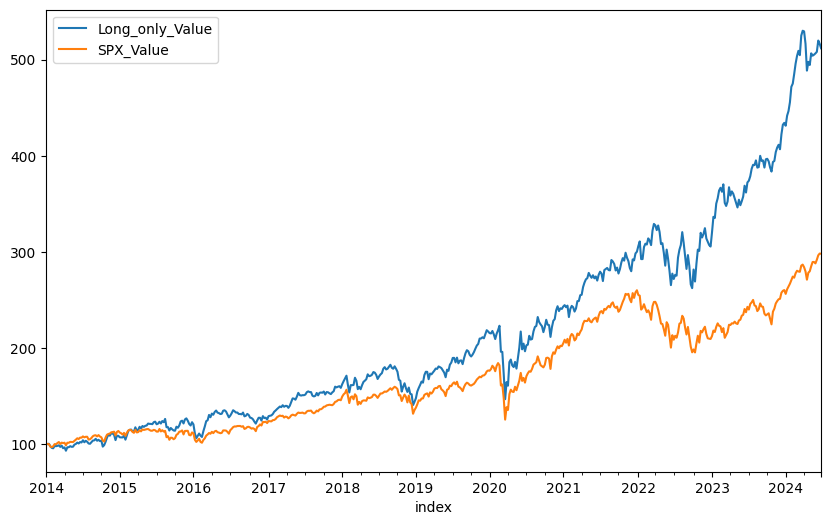

In [ ]:
plt.figure(figsize=(10, 6))

my_pf_longonly.plot(ax=plt.gca(), label='my_pf_longonly')
spx.plot(ax=plt.gca(), label='spx')

plt.legend()
plt.show()